<a href="https://colab.research.google.com/github/urness/CS167Fall2025/blob/main/Day16_Perceptrons_and_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day16
##Perceptrons and SGD

#### CS167: Machine Learning, Fall 2025


In [ ]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


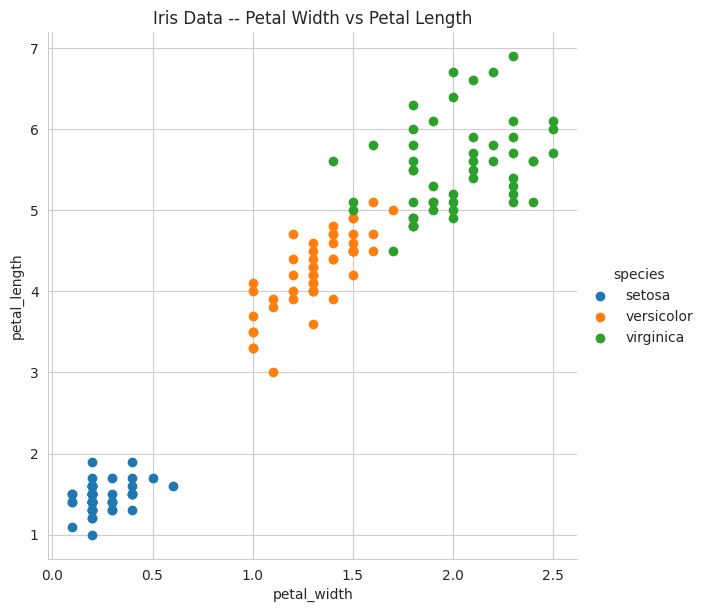

In [ ]:
#let's take a look at the data:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
sns.set_style("whitegrid")

# use seaborn to create a scatterplot
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'petal_width',
                              'petal_length').add_legend().set(title='Iris Data -- Petal Width vs Petal Length')

In [ ]:
import pandas as pd
# load the data
iris_df = pd.read_csv("/content/drive/MyDrive/CS167/datasets/irisData.csv")

# this is new
# we are going to use a perceptron, which has a boolean output (1 or -1) so let's
# use the Iris dataset to just predict if an Iris is a particular species (e.g. Setosa) or NOT
# So, let's turn the target column, "species" into a boolean, using get_dummies
iris_dummies = pd.get_dummies(iris_df, columns=['species'])
iris_dummies.head()

,sepal length,sepal width,petal length,petal width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


## Perceptron Code
Documentation: [`sklearn.linear_model.Perceptron()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
### use a Perceptron to predict if an iris is a Setosa

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import metrics

In [ ]:
predictors = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = "species_Iris-setosa"
#target = "species_Iris-versicolor"
#target = "species_Iris-virginica"

#establish training and testing sets
train_data, test_data, train_sln, test_sln = train_test_split(iris_dummies[predictors], iris_dummies[target], test_size = 0.2, random_state=41)

In [ ]:
from sklearn.linear_model import Perceptron

#load up scikit-learn Perceptron
perc = Perceptron(tol=None)
perc.fit(train_data,train_sln)
iris_perc_predictions = perc.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, iris_perc_predictions))
#print out a confusion matrix
iris_labels= [False, True]
conf_mat = metrics.confusion_matrix(test_sln, iris_perc_predictions, labels=iris_labels)
print(pd.DataFrame(conf_mat,index = iris_labels, columns = iris_labels))

accuracy: 1.0
       False  True 
False     21      0
True       0      9


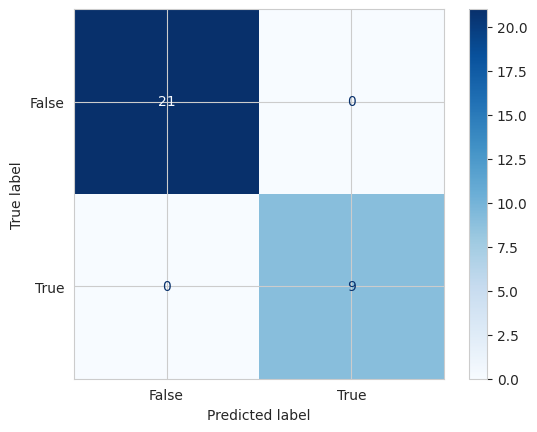

In [ ]:
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=iris_labels)
displ.plot(cmap=plt.cm.Blues)
plt.show()

##In class Exercise:

Given the example for species_Iris-setosa, how does Perceptron do for:
- `species_Iris-virginica`
- `species_Iris-versicolor`

Do you expect these to also give 100% accuracy? Why or why not?

# Gradient Descent

# Boston Housing Dataset:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [ ]:
# Code using SGD on Boston Housing Dataset:
# #ignore warings -- there are lots of warnings regarding default values of Perceptron; which we accept
# import warnings
# warnings.filterwarnings("ignore")
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

# load the data
housing_df = pd.read_csv("/content/drive/MyDrive/CS167/datasets/boston_housing.csv")
predictors = housing_df.columns.drop("MEDV")
target = "MEDV"

#split the data
train_data, test_data, train_sln, test_sln = \
       train_test_split(housing_df[predictors], housing_df[target], test_size = 0.2, random_state=41)

#TODO: Implement scikit-learn SGD

Your result will likely be pretty bad. What's going on here? Can you fix it to make the R2 values over 0.5?

- [`sklearn` User Guide on Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/sgd.html#)
- Documentation: [`sklearn.linear_model.SGDRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

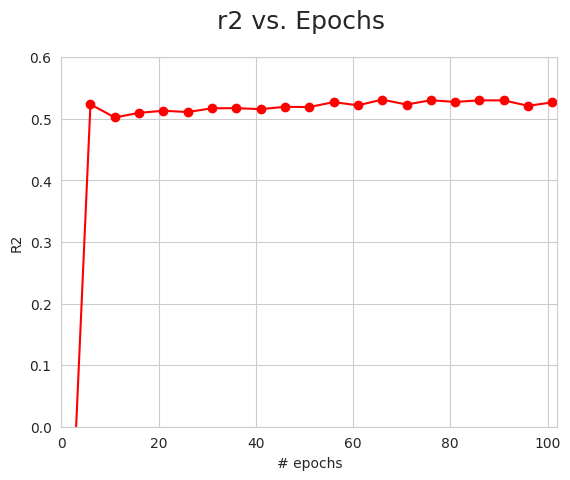

In [ ]:
#Can you make the following graph?